In [ ]:
Practical 3 Multinomial Logistic Regression (Iris Dataset)

In [1]:
#Loading the libraries and the data
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [16]:
#for readable figures
pd.set_option('float_format', '{:f}'.format)
iris = pd.read_csv("./Iris_Data.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.100000,3.500000,1.400000,0.200000,Iris-setosa
1,4.900000,3.000000,1.400000,0.200000,Iris-setosa
2,4.700000,3.200000,1.300000,0.200000,Iris-setosa
3,4.600000,3.100000,1.500000,0.200000,Iris-setosa
4,5.000000,3.600000,1.400000,0.200000,Iris-setosa


In [17]:
x = iris.drop('species', axis=1)
y = iris['species']
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

In [18]:
#Fit the model
log_reg = LogisticRegression(solver='newton-cg', multi_class='multinomial')
log_reg.fit(trainX, trainY)
y_pred = log_reg.predict(testX)

In [19]:
# Model validation
# print the accuracy and error rate:
print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))
print('Error rate: {:.2f}'.format(1 - accuracy_score(testY, y_pred)))


Accuracy: 0.97
Error rate: 0.03


In [20]:
# look at the scores from cross validation:
clf = LogisticRegression(solver='newton-cg', multi_class='multinomial')
scores = cross_val_score(clf, trainX, trainY, cv=5)
scores

array([1.        , 1.        , 1.        , 0.91666667, 0.95833333])

In [21]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.97 (+/- 0.07)


In [22]:
#look at the confusion matrix:
confusion_matrix = confusion_matrix(testY, y_pred)
print(confusion_matrix)

[[11  0  0]
 [ 0  8  1]
 [ 0  0 10]]


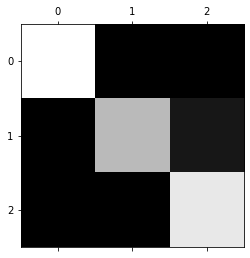

In [23]:
#If you have many variables, it makes sense to plot the confusion matrix:
plt.matshow(confusion_matrix, cmap=plt.cm.gray)
plt.show()

In [24]:
#Calculated probabilities
#get the probabilities of the predicted classes
probability = log_reg.predict_proba(testX)
probability

array([[9.84318716e-01, 1.56812457e-02, 3.82157191e-08],
       [4.32843456e-06, 1.72053824e-02, 9.82790289e-01],
       [9.02222781e-03, 9.37858371e-01, 5.31194015e-02],
       [3.88425029e-04, 1.71896072e-01, 8.27715503e-01],
       [9.47999234e-01, 5.20006123e-02, 1.53951243e-07],
       [9.95056935e-01, 4.94306163e-03, 3.73376550e-09],
       [9.68242172e-01, 3.17576916e-02, 1.35919310e-07],
       [9.68922508e-01, 3.10771963e-02, 2.96102982e-07],
       [2.09713042e-02, 9.56743144e-01, 2.22855517e-02],
       [9.65448970e-01, 3.45509552e-02, 7.46338644e-08],
       [9.47507203e-01, 5.24923377e-02, 4.59076615e-07],
       [2.51417808e-02, 9.25468035e-01, 4.93901841e-02],
       [1.56997612e-03, 4.70791306e-01, 5.27638718e-01],
       [7.79120413e-04, 4.86921805e-01, 5.12299074e-01],
       [1.23058133e-04, 5.04403109e-02, 9.49436631e-01],
       [6.65067467e-03, 9.24329452e-01, 6.90198732e-02],
       [9.84969638e-01, 1.50303126e-02, 4.91853269e-08],
       [9.74344915e-01, 2.56550

In [25]:
#Each column here represents a class. The class with the highest probability is␣
,→the output of the predicted class. Here we can see that the length of the␣
,→probability data is the same as the length of the test data.
print(probability.shape[0])
print(testX.shape[0])


SyntaxError: invalid character '→' (U+2192) (3385936091.py, line 2)

In [26]:
#output into shape and a readable format
df = pd.DataFrame(log_reg.predict_proba(testX), columns=log_reg.classes_)
df.head()
#with the .classes_ function we get the order of the classes that Python gave.

,Iris-setosa,Iris-versicolor,Iris-virginica
0,0.984319,0.015681,0.000000
1,0.000004,0.017205,0.982790
2,0.009022,0.937858,0.053119
3,0.000388,0.171896,0.827716
4,0.947999,0.052001,0.000000


In [27]:
#sum of the probabilities must always be 1
df['sum'] = df.sum(axis=1)
df.head()

,Iris-setosa,Iris-versicolor,Iris-virginica,sum
0,0.984319,0.015681,0.000000,1.000000
1,0.000004,0.017205,0.982790,1.000000
2,0.009022,0.937858,0.053119,1.000000
3,0.000388,0.171896,0.827716,1.000000
4,0.947999,0.052001,0.000000,1.000000


In [28]:
# add the predicted classes…
df['predicted_class'] = y_pred
df.head()

,Iris-setosa,Iris-versicolor,Iris-virginica,sum,predicted_class
0,0.984319,0.015681,0.000000,1.000000,Iris-setosa
1,0.000004,0.017205,0.982790,1.000000,Iris-virginica
2,0.009022,0.937858,0.053119,1.000000,Iris-versicolor
3,0.000388,0.171896,0.827716,1.000000,Iris-virginica
4,0.947999,0.052001,0.000000,1.000000,Iris-setosa


In [29]:
#actual classes:
df['actual_class'] = testY.to_frame().reset_index().drop(columns='index')
df.head()

,Iris-setosa,Iris-versicolor,Iris-virginica,sum,predicted_class,actual_class
0,0.984319,0.015681,0.000000,1.000000,Iris-setosa,Iris-setosa
1,0.000004,0.017205,0.982790,1.000000,Iris-virginica,Iris-virginica
2,0.009022,0.937858,0.053119,1.000000,Iris-versicolor,Iris-versicolor
3,0.000388,0.171896,0.827716,1.000000,Iris-virginica,Iris-virginica
4,0.947999,0.052001,0.000000,1.000000,Iris-setosa,Iris-setosa


In [30]:
#do a plausibility check whether the classes were predicted correctly.
le = preprocessing.LabelEncoder()
df['label_pred'] = le.fit_transform(df['predicted_class'])
df['label_actual'] = le.fit_transform(df['actual_class'])
df.head()


,Iris-setosa,Iris-versicolor,Iris-virginica,sum,predicted_class,actual_class,label_pred,label_actual
0,0.984319,0.015681,0.000000,1.000000,Iris-setosa,Iris-setosa,0,0
1,0.000004,0.017205,0.982790,1.000000,Iris-virginica,Iris-virginica,2,2
2,0.009022,0.937858,0.053119,1.000000,Iris-versicolor,Iris-versicolor,1,1
3,0.000388,0.171896,0.827716,1.000000,Iris-virginica,Iris-virginica,2,2
4,0.947999,0.052001,0.000000,1.000000,Iris-setosa,Iris-setosa,0,0


In [31]:
#see that the two variables (predicted_class & actual_class) were coded the same and can therefore be continued properly.

In [32]:
targets = df['predicted_class']
integerEncoded = le.fit_transform(targets)
integerMapping=dict(zip(targets,integerEncoded))
integerMapping


{'Iris-setosa': 0, 'Iris-virginica': 2, 'Iris-versicolor': 1}

In [33]:
targets = df['actual_class']
integerEncoded = le.fit_transform(targets)
integerMapping=dict(zip(targets,integerEncoded))
integerMapping

{'Iris-setosa': 0, 'Iris-virginica': 2, 'Iris-versicolor': 1}

In [34]:
#plausibility check whether the classes were predicted correctly. If the result of subtraction is 0, it was a correct estimate of the model.


In [35]:
df['check'] = df['label_actual'] - df['label_pred']
df.head(7)

,Iris-setosa,Iris-versicolor,Iris-virginica,sum,predicted_class,actual_class,label_pred,label_actual,check
0,0.984319,0.015681,0.000000,1.000000,Iris-setosa,Iris-setosa,0,0,0
1,0.000004,0.017205,0.982790,1.000000,Iris-virginica,Iris-virginica,2,2,0
2,0.009022,0.937858,0.053119,1.000000,Iris-versicolor,Iris-versicolor,1,1,0
3,0.000388,0.171896,0.827716,1.000000,Iris-virginica,Iris-virginica,2,2,0
4,0.947999,0.052001,0.000000,1.000000,Iris-setosa,Iris-setosa,0,0,0
5,0.995057,0.004943,0.000000,1.000000,Iris-setosa,Iris-setosa,0,0,0
6,0.968242,0.031758,0.000000,1.000000,Iris-setosa,Iris-setosa,0,0,0


In [36]:
#For better orientation, we give the observations descriptive names and delete unnecessary columns.
df['correct_prediction?'] = np.where(df['check'] == 0, 'True', 'False')
df = df.drop(['label_pred', 'label_actual', 'check'], axis=1)
df.head()


,Iris-setosa,Iris-versicolor,Iris-virginica,sum,predicted_class,actual_class,correct_prediction?
0,0.984319,0.015681,0.000000,1.000000,Iris-setosa,Iris-setosa,True
1,0.000004,0.017205,0.982790,1.000000,Iris-virginica,Iris-virginica,True
2,0.009022,0.937858,0.053119,1.000000,Iris-versicolor,Iris-versicolor,True
3,0.000388,0.171896,0.827716,1.000000,Iris-virginica,Iris-virginica,True
4,0.947999,0.052001,0.000000,1.000000,Iris-setosa,Iris-setosa,True


In [37]:
#use the generated “values” to manually calculate the accuracy again.
true_predictions = df[(df["correct_prediction?"] == 'True')].shape[0]
false_predictions = df[(df["correct_prediction?"] == 'False')].shape[0]
total = df["correct_prediction?"].shape[0]
print('manual calculated Accuracy is:', (true_predictions / total * 100))


manual calculated Accuracy is: 96.66666666666667


In [38]:
#take finally a look at the probabilities of the mispredicted classes
wrong_pred = df[(df["correct_prediction?"] == 'False')]
wrong_pred

,Iris-setosa,Iris-versicolor,Iris-virginica,sum,predicted_class,actual_class,correct_prediction?
29,0.000679,0.357515,0.641806,1.000000,Iris-virginica,Iris-versicolor,False


In [41]:
#Multinomial Logit with the statsmodel library
#To get the p-values of the model created above we have to use the statsmodel␣library again.
x = iris.drop('species', axis=1)
y = iris['species']
x = sm.add_constant(x, prepend = False)
mnlogit_mod = sm.MNLogit(y, x)
mnlogit_fit = mnlogit_mod.fit()
print (mnlogit_fit.summary())

         Current function value: 18.236001
         Iterations: 35
                          MNLogit Regression Results                          
Dep. Variable:                species   No. Observations:                  150
Model:                        MNLogit   Df Residuals:                      140
Method:                           MLE   Df Model:                            8
Date:                Fri, 27 May 2022   Pseudo R-squ.:                  -15.60
Time:                        19:03:33   Log-Likelihood:                -2735.4
converged:                      False   LL-Null:                       -164.79
Covariance Type:            nonrobust   LLR p-value:                     1.000
species=Iris-versicolor       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
sepal_length                4.2844   2.37e+04      0.000      1.000   -4.64e+04    4.64e+04
sepal_width              

D:\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
